In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_curve, roc_auc_score, f1_score
from IPython.display import Image
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\winequality-red data.csv")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
## THE DATASET CONSIST FOLLOWING INPUT VARIAVLES:- 1- fixed acidity, 2- volatile acidity, 3- citric acid, 4- residual sugar, 5- chlorides, 6-free sulfur dioxide, 7-total sulfur dioxide 
# total sulfur dioxide,8- density, 9- pH, 10- sulphates, 11- alcohol, AND THE OUTPUT OF THE VARIABLE GIVES THE QUALITY OF THE WINE BASED ON THE INPUT VARIABLES:
# 12- quality[SCORE BETWEEN 0 AND 10]

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# minmum quality 3, maximum quality 8 [ good quality is 8,10] incresing order mai
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
data[data["quality"]==8]["residual sugar"].describe()

count    18.000000
mean      2.577778
std       1.295038
min       1.400000
25%       1.800000
50%       2.100000
75%       2.600000
max       6.400000
Name: residual sugar, dtype: float64

C:\Users\MILI MAHESHWARI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

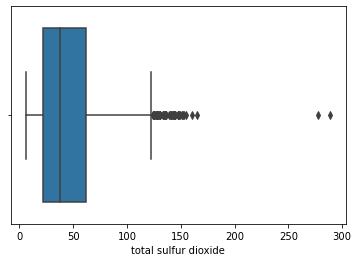

In [10]:
sns.boxplot(data['total sulfur dioxide'])

In [11]:
##total sulfur dioxide mai outlier bahut saare hai

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

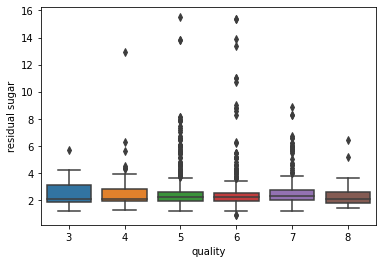

In [12]:
sns.boxplot(x = data['quality'], y = data['residual sugar'], data = data)## QUALITY KA RESIDUALS KE SATH

<AxesSubplot:xlabel='quality', ylabel='pH'>

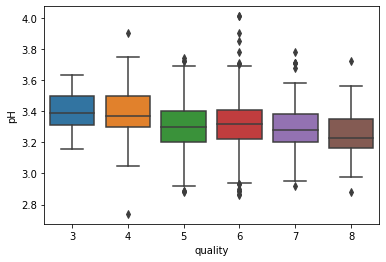

In [13]:
sns.boxplot(x = data['quality'], y = data['pH'], data = data)## PH KA QUALITY KE SAATH...

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

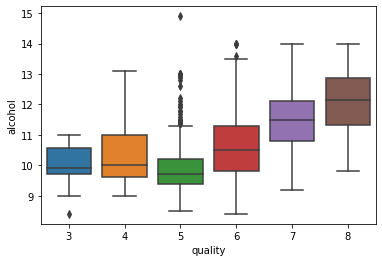

In [14]:
sns.boxplot(x = data['quality'], y = data['alcohol'], data = data) 

In [15]:
## JISME ALCHOLO LEVEL JADA HOTA HAI WO ACHI WINE HOTI HAI... [7,8 MAI JADA HAI]

In [16]:
## ALCOHOL JADA HONA CHAYIYE 
## PH KM HONA CHAYIYE
## DENSITY BHI KM HONI CHAYIYE

<AxesSubplot:xlabel='quality', ylabel='density'>

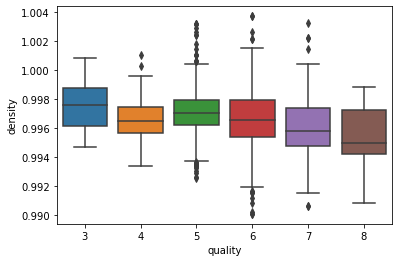

In [17]:
sns.boxplot(x = data['quality'], y = data['density'], data = data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

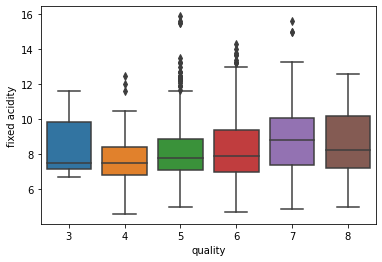

In [18]:
sns.boxplot(x = data['quality'], y = data['fixed acidity'], data = data)

In [19]:
q = data['pH'].quantile(0.999)

data = data[data['pH']<q]

C:\Users\MILI MAHESHWARI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH'>

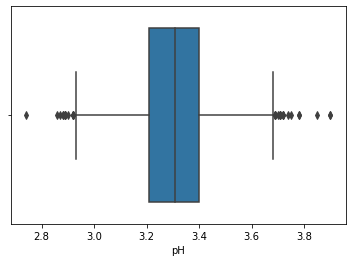

In [20]:
sns.boxplot(data['pH'])

C:\Users\MILI MAHESHWARI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

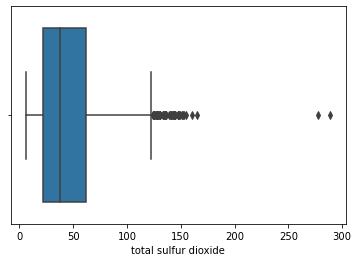

In [21]:
sns.boxplot(data['total sulfur dioxide'])

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1597.0,8.323544,1.738664,4.60000,7.1000,7.90000,9.20000,15.90000
volatile acidity,1597.0,0.527555,0.179014,0.12000,0.3900,0.52000,0.64000,1.58000
citric acid,1597.0,0.271315,0.194687,0.00000,0.0900,0.26000,0.42000,1.00000
residual sugar,1597.0,2.540482,1.410014,0.90000,1.9000,2.20000,2.60000,15.50000
chlorides,1597.0,0.087525,0.047066,0.01200,0.0700,0.07900,0.09000,0.61100
free sulfur dioxide,1597.0,15.874765,10.466708,1.00000,7.0000,14.00000,21.00000,72.00000
total sulfur dioxide,1597.0,46.468378,32.915925,6.00000,22.0000,38.00000,62.00000,289.00000
density,1597.0,0.996752,0.001883,0.99007,0.9956,0.99675,0.99784,1.00369
pH,1597.0,3.310238,0.152487,2.74000,3.2100,3.31000,3.40000,3.90000
sulphates,1597.0,0.658234,0.169596,0.33000,0.5500,0.62000,0.73000,2.00000


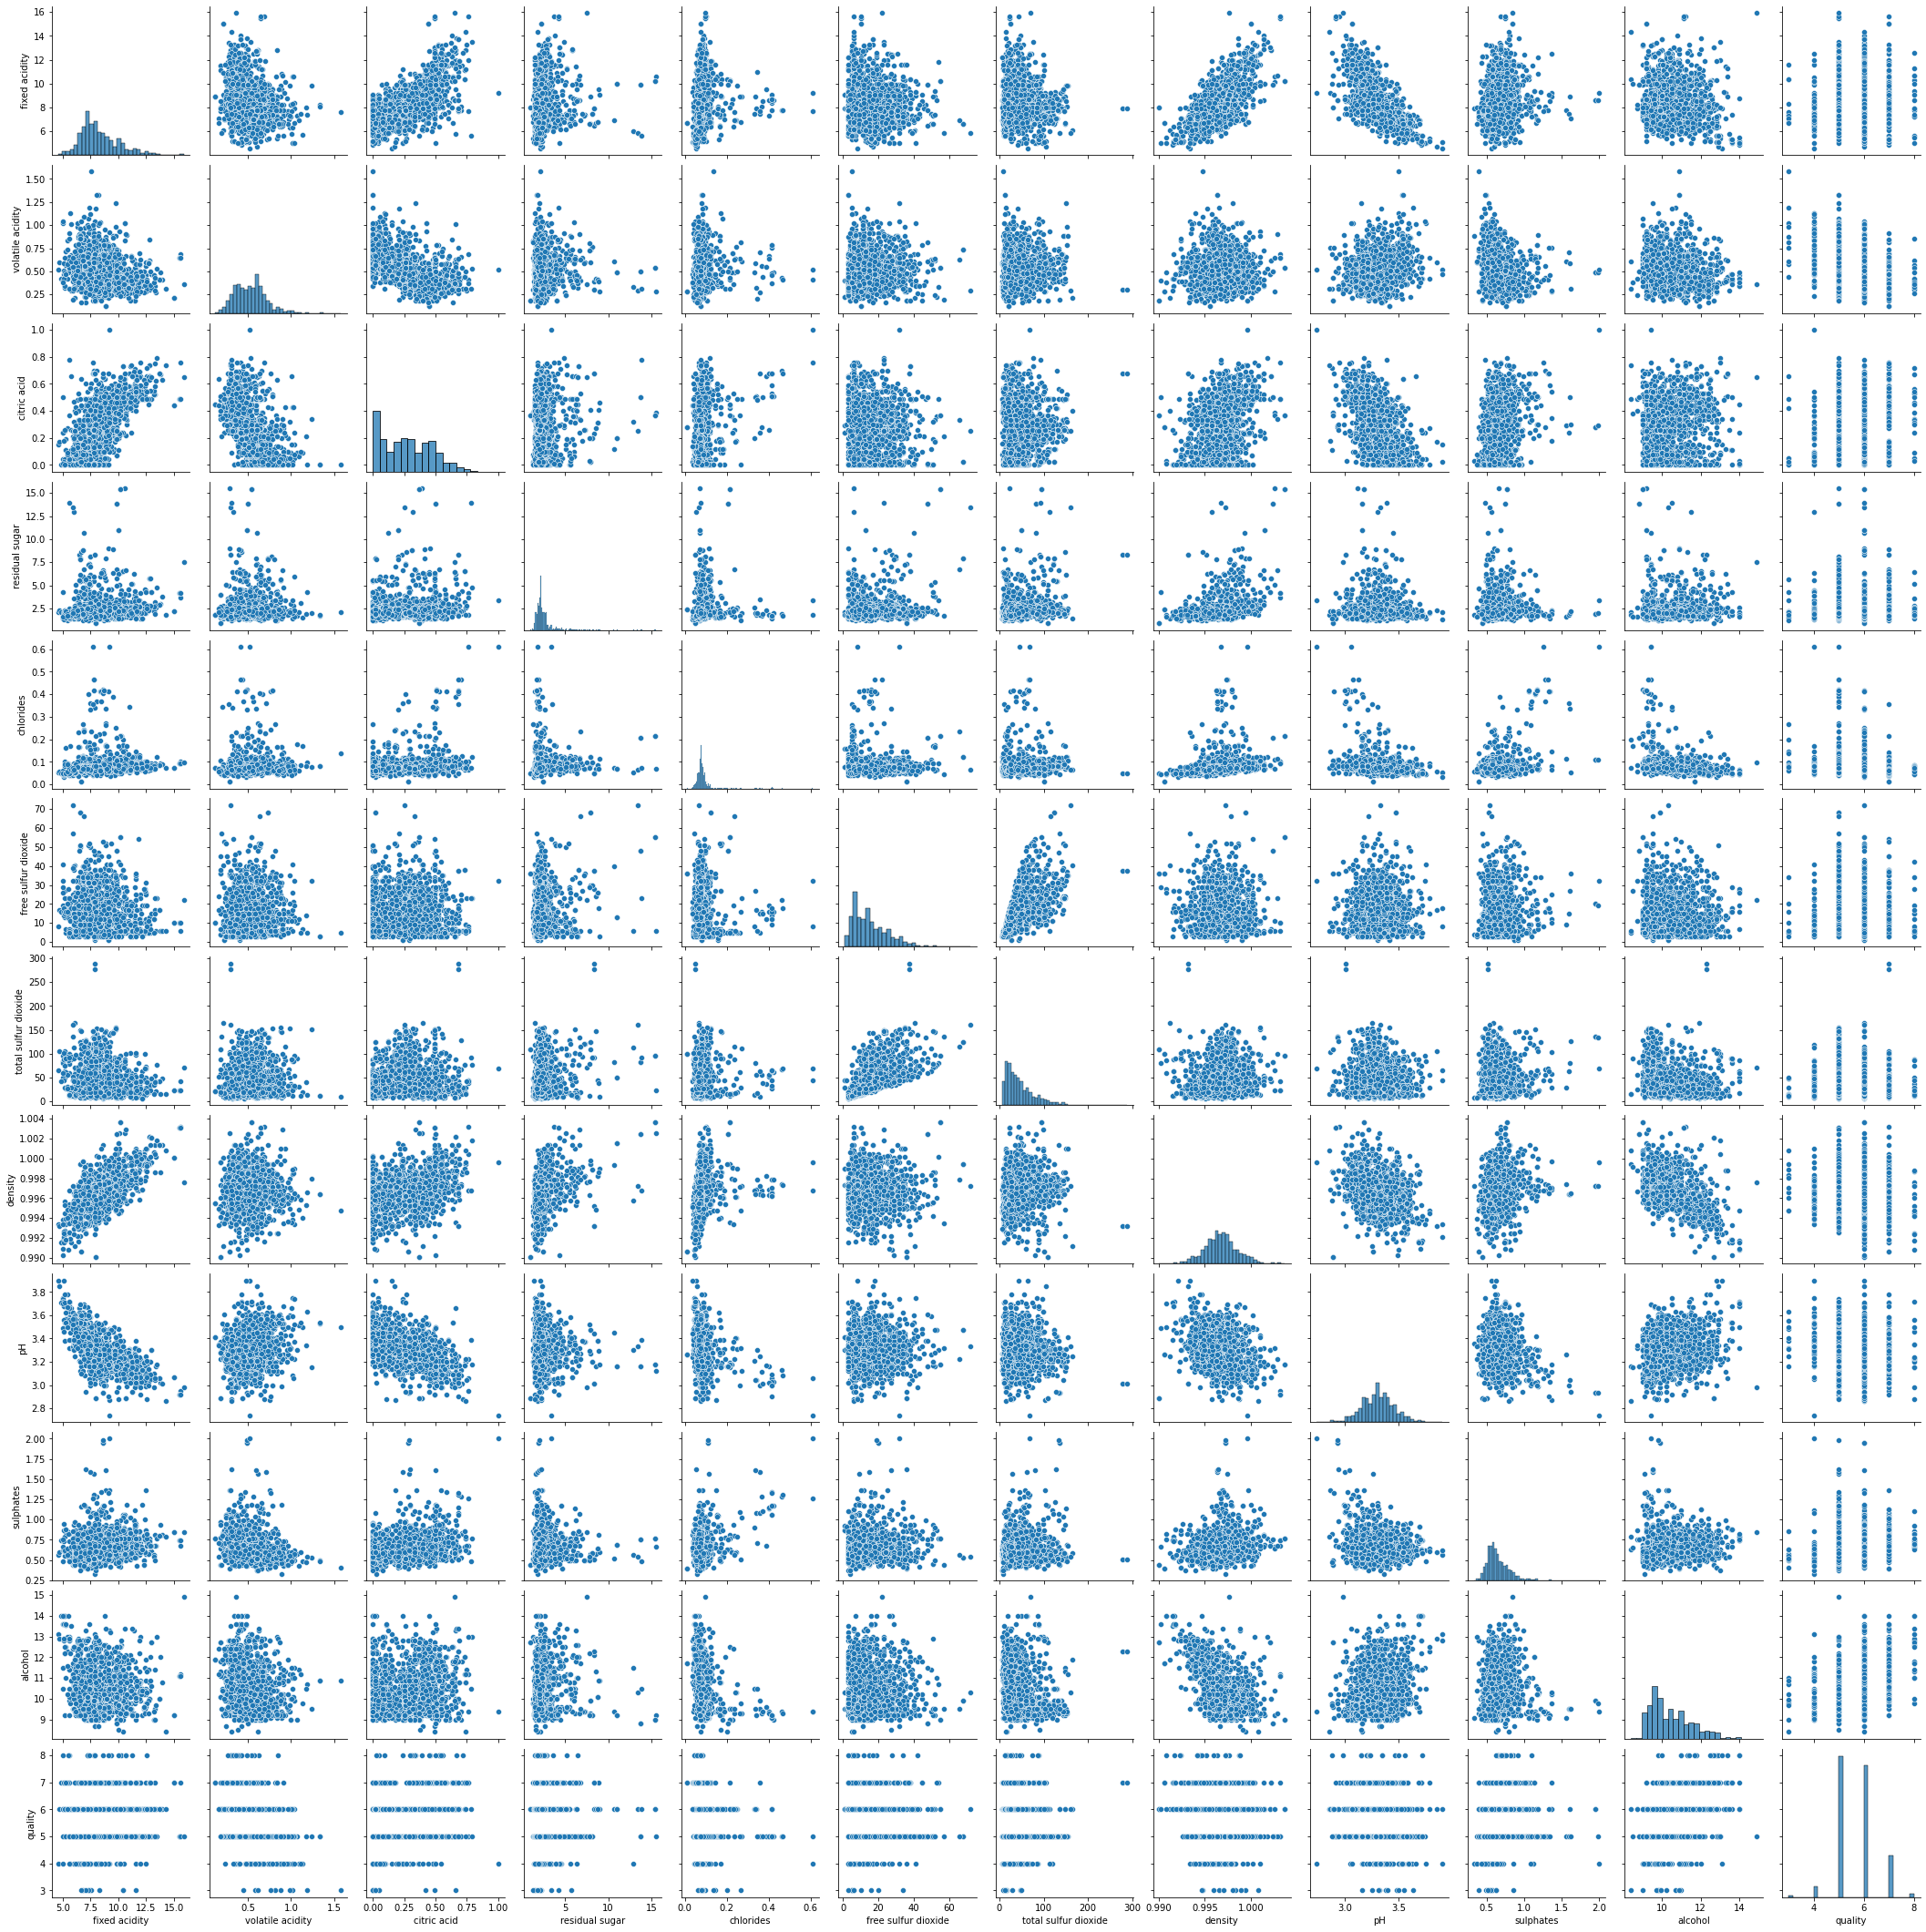

In [23]:
## QUALITY KE SAATH SABKI PREDICION:--
sns.pairplot(data)

In [24]:
##pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [26]:
X = data.drop(columns = ['quality','volatile acidity','chlorides','total sulfur dioxide','free sulfur dioxide','sulphates'])
y = data['quality']

In [27]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X,y) ##(X,y ki over sampling)

In [28]:
from collections import Counter

In [29]:
Counter(y_smote)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.25,random_state = 42)

In [31]:
x_train.shape

(3064, 6)

In [32]:
y_train.shape

(3064,)

In [33]:
y_test.shape

(1022,)

In [34]:
x_test.shape

(1022, 6)

In [35]:
clf = DecisionTreeClassifier(max_depth = 19)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=19)

In [36]:
y_pred= clf.predict(x_test)


In [37]:
acc = accuracy_score(y_test,y_pred)

In [38]:
acc ## total no. of true positive & total no. of true negative/ total no.of data points

0.7201565557729941

In [39]:
c = confusion_matrix(y_test,y_pred)

In [40]:
c

array([[150,   7,   6,   5,   0,   0],
       [  5, 128,  12,  14,   7,   1],
       [  5,  26, 102,  44,   5,   1],
       [  3,  12,  46,  95,  19,  14],
       [  0,   3,   9,  17, 112,   7],
       [  0,   0,   1,   7,  10, 149]], dtype=int64)

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1 = f1_score(y_test,y_pred,average = "weighted")

In [43]:
f1 ## harmonic means

0.7188165029146126

In [44]:
## 74  overfit ni kr raha hai

In [45]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity', 'citric acid', 'residual sugar', 'density', 'pH', 'alcohol']

In [52]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

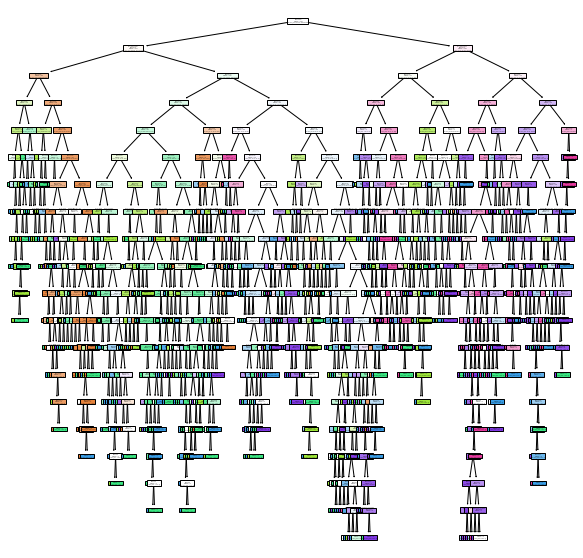

In [55]:
fig = plt.figure(figsize = (10,10))
x = tree.plot_tree(clf,feature_names = feature_name,filled = True)
plt.show();

In [59]:
fig.savefig("decision_tree.pdf")

In [ ]:
## LETS UNDERSTAND THE ABOVE TREE:- 

# ALCOHOL <= -0.069
# GINI = 0.648
# SAMPLES = 1119
# VALUE = [8,36,468,446,145,16]

# 1] THE 1ST VALUE INDICATES THE COLUMN AND THE CONDITION ON WHICH THE ROOT NODE WAS SELECTED AND FURTHER WILL BE SPLITTED.
# 2] THE 2ND VALUE GIVES THE GINI IMPURITY OF THE SELECTED NODE.
# 3] SAMPLES GIVES THE NUMBER OF OBSERVATION AT THAT POINT OF TIME PRESENT IN THE NODE.
# 4] VALUE WITHIN THE SQUARE BRACKETS REPRESENTS NUMBER OF OBSERVATION PRESENT IN EACH CLASS(OUTPUT) IN THE ABOVE GIVEN FIGURE,8 OBSERVATION ARE IN 1,38 IN CLASS 2,468 IN CLASS 3 AND SO ON.

In [65]:
## we are tuning three hyperparameter right now, we are passing the diffrent 

grid_param ={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [66]:
## CROSS VALIDATION PART:-

grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5, ##5 times data mai hydration ho [5 bar twing bhi krega, 5 bar hydrade bhi krega]
                          n_jobs =-1) ## computation cose mai kitna ingage krna chate hai (-1means saare compose grid search hone mai lg gye)

In [69]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=19), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [ ]:
## SPLITER MAI BEST OR RANDOM KA MATLOB HAI 
# = BEST SPLIT JB HOTA HAII THO WO GINI INDEX KE BASES PR DECIDE KRTA HAI]
# = RANDOM MAI KYA KRTA HAI RANDOMLLY SPLIT KRTA HAI

In [70]:
## hyperparameter twing (parameters ki value ko thoda twing kiya better performance ke liye.)
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [71]:
grid_search.best_score_

0.7464142916546717